In [1]:
# Setup
import sys
import os
import sklearn
import pandas as pd
import numpy as np
import tensorflow as tf
import zipfile
import matplotlib as mpl
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score


#from keras.datasets import create_dataset
#from keras.utils import get_file
#from emnist import list_datasets


# To plot pretty figures
%matplotlib inline
import matplotlib.pyplot as plt


# Create the decision tree classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#Load Data
mnist = tf.keras.datasets.mnist
# (X_train, y_train), (X_test, y_test) = mnist.load_data()


# # Extract the contents of the zip file
# zip_file = zipfile.ZipFile(file_path, "r")
# zip_file.extractall()
# zip_file.close()

#list_datasets()

#load files:
trainfile = "C:/Users/tiene/datasets/Exams/MNIST/emnist-digits-train.csv"
testfile = "C:/Users/tiene/datasets/Exams/MNIST/emnist-digits-test.csv"

#Make training dates:
train_set = pd.read_csv(trainfile).to_numpy()
test_set = pd.read_csv(testfile).to_numpy()


#(X_train, y_train), (X_test, y_test) = create_dataset("emnist")

In [3]:
#Download images of letters from training samples or test samples
#from emnist import extract_test_samples
# from emnist import extract_training_samples
# images, labels = extract_training_samples('letters')
# images.reshape(124800, 784)
# images.flatten()
# labels = ["A", "B", "C", ...]
#images.shape

#Shape of samples: train_set
train_set.shape

(239999, 785)

In [4]:
#Shape of samples: test_set
test_set.shape

(39999, 785)

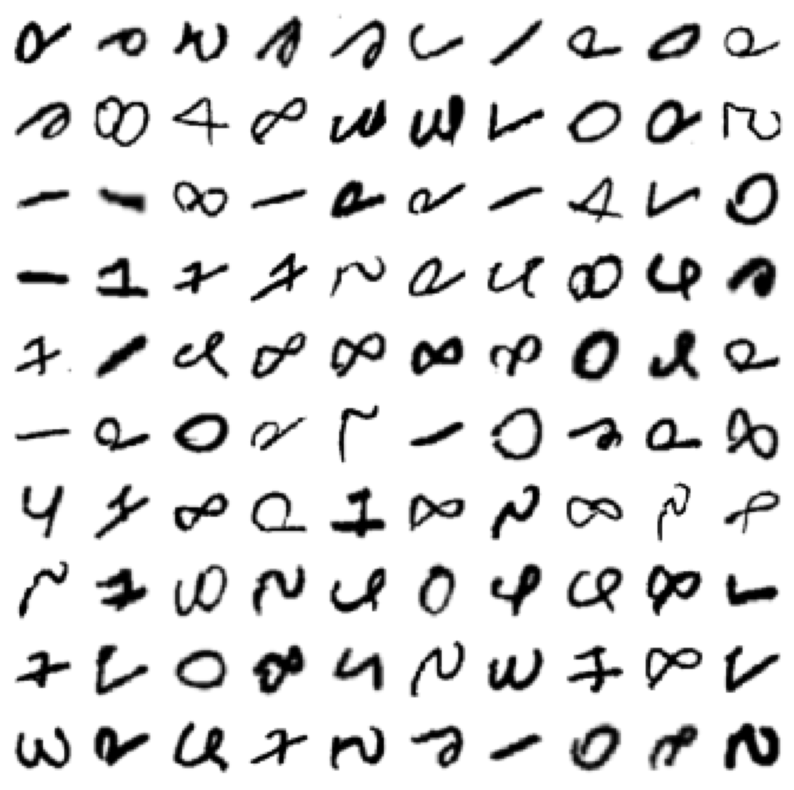

In [5]:
# pd.DataFrame(history.history).plot(figsize=(8,5))
# plt.grid(True)
# plt.gca().train_set(0,1)
# plt.show()

# fig,axes = plt.subplots(3,5,figsize=(10,8))
# for i,ax in enumerate(axes.flat):
#     ax.imshow(test_set[0].reshape[28, 28])

# digits = train_set.data[:100]
# labels = test_set.data[:100]


# fig, axes = plt.subplots(10, 10, figsize=(10,10))

# for i, ax in enumerate(axes.flat):
#     ax.matshow(labels[i].reshape(8, 8), cmap="binary")
#     ax.axis("off")

# # Show the figure
# plt.show()    
    
# some_digits = test_set[0].reshape[28, 28]
# plt.imshow(some_digits, cmap= binary)
# plt.axis("off")
# plt.show


#Get the first 100 images and labels from the train and test sets
# train_images = np.array(train_set.iloc[:100,1:])
# train_labels = np.array(train_set.iloc[:100,0])
# test_images = np.array(test_set.iloc[:100,1:])
# test_labels = np.array(test_set.iloc[:100,0])

# train_images = train_set.take(range(100), axis=0)
# train_labels = train_set.take(range(100), axis=0)
# test_images = test_set.take(range(100), axis=0)
# test_labels = test_set.take(range(100), axis=0)

# train_images = np.array(train_set.iloc[:100, 1:]).reshape(100, 28, 28)
# train_labels = np.array(train_set.iloc[:100, 0])
# test_images = np.array(test_set.iloc[:100, 1:]).reshape(100, 28, 28)
# test_labels = np.array(test_set.iloc[:100, 0])


#the numpy ndarray.take method to select the first 100 rows and all columns of these DataFrames. 
#The code will then use the reshape method to convert the resulting arrays to the correct shape, 
#And store the resulting arrays in the train_images and test_images variables.

train_images = np.array(train_set.take(range(100), axis=0)[:, 1:]).reshape(100, 28, 28) 
# display all rows and all columns after the first
train_labels = np.array(train_set.take(range(100), axis=0)[:, 0]) 
# display all rows and the first column
test_images = np.array(test_set.take(range(100), axis=0)[:, 1:]).reshape(100, 28, 28)
# display all rows and all columns after the first
test_labels = np.array(test_set.take(range(100), axis=0)[:, 0]) 
# display all rows and the first column


#fig, axes = plt.subplots(10, 10, figsize=(10,10))
fig, axes = plt.subplots(10, 10, figsize=(10, 10), sharex=True, sharey=True)


# Loop through the subplots and display each image
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i].reshape(28, 28), cmap="binary")
    ax.axis("off")

# Show the figure
plt.show()


In [6]:
test_set[0]

array([  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [7]:
train_set[0]

array([  9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,  20,  95, 170, 115,  22,   1,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,  32,  20,   0,   0,
         0,   0,   0,   0,   0,   0,  12, 123, 231, 252, 245, 15

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_set[:39999],test_set, test_size=0.2, random_state=42)

In [ ]:
# #Train and fine-tune a RandomForestClassifier (this will take many minutes)

# Train the random forest classifier with different hyperparameter values
# model = RandomForestClassifier(n_estimators=100, max_depth=10, oob_score=True, n_jobs=-1, verbose=2, random_state=42)
model = RandomForestClassifier(n_estimators=100, max_depth=10, oob_score=True, n_jobs=1, verbose=2, random_state=42,
                              min_samples_split=2, min_samples_leaf=1, max_features='sqrt', criterion='gini', bootstrap=True)
model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


In [ ]:
# Evaluate

y_pred = model.predict(X_test)